In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/weatherAUS.csv')


In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.shape

(86877, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80678 entries, 0 to 86876
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           80678 non-null  object 
 1   Location       80678 non-null  object 
 2   MinTemp        80678 non-null  float64
 3   MaxTemp        80678 non-null  float64
 4   Rainfall       80678 non-null  float64
 5   WindGustDir    80678 non-null  object 
 6   WindGustSpeed  80678 non-null  float64
 7   WindDir9am     80678 non-null  object 
 8   WindDir3pm     80678 non-null  object 
 9   WindSpeed9am   80678 non-null  float64
 10  WindSpeed3pm   80678 non-null  float64
 11  Humidity9am    80678 non-null  float64
 12  Humidity3pm    80678 non-null  float64
 13  Pressure9am    80678 non-null  float64
 14  Pressure3pm    80678 non-null  float64
 15  Cloud9am       80678 non-null  float64
 16  Cloud3pm       80678 non-null  float64
 17  Temp9am        80678 non-null  float64
 18  Temp3p

#NAN değerleri doldurma/silme

In [ ]:
data.drop(['Evaporation','Sunshine'], axis =1, inplace = True)

In [ ]:
data.isna().sum()

In [ ]:
objectcols = ['WindGustDir','WindDir9am','WindDir3pm']
numcols = ['Cloud9am','Cloud3pm','WindGustSpeed','Pressure9am','Pressure3pm']
drop_nan_columns = ['MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']

In [ ]:
data.dropna(subset = drop_nan_columns , inplace = True)

In [ ]:
for columns in objectcols :
  data[columns].fillna(data[columns].mode()[0], inplace=True)

In [ ]:
for columns in numcols :
  data[columns].fillna(data[columns].mean(),inplace= True)

#Visualization

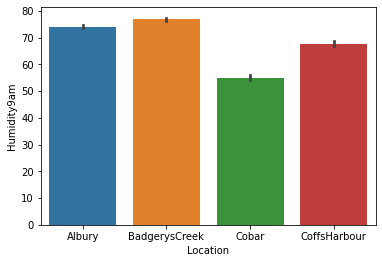

In [ ]:
data_vis = data.loc[:][:10000]
sns.barplot(data = data_vis, x = 'Location', y = 'Humidity9am')
plt.show()

In [ ]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [ ]:
data.drop('Date', axis =1, inplace = True)

#Encode-Normalization

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()

In [ ]:
object_encode_columns = ['WindGustDir','Location','WindDir9am','WindDir3pm','RainToday']

In [ ]:
for columns in object_encode_columns :
  data[columns] = le.fit_transform(data[columns])

In [ ]:
numcols_normalization = ['Cloud9am','Cloud3pm','WindGustSpeed','Pressure9am','Pressure3pm','MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm'
,'Humidity9am','Humidity3pm','Temp9am','Temp3pm']


In [ ]:
data['RainTomorrow'] = [0 if i  == 'No' else 1 for i in data['RainTomorrow']]

In [ ]:
for column in numcols_normalization:
   scaler = MinMaxScaler()
   data[column]= scaler.fit_transform(data[column].values.reshape(-1,1))

In [ ]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,0.542079,0.531670,0.001617,13,0.289062,13,14,0.229885,0.289157,0.701031,0.212121,0.452579,0.477080,0.888889,0.592086,0.536748,0.522073,0,0
1,0,0.393564,0.573896,0.000000,14,0.289062,6,15,0.045977,0.265060,0.422680,0.242424,0.500832,0.488964,0.519562,0.592086,0.543430,0.570058,0,0
2,0,0.529703,0.585413,0.000000,15,0.304688,13,15,0.218391,0.313253,0.360825,0.292929,0.450915,0.504244,0.519562,0.250000,0.628062,0.548944,0,0
3,0,0.438119,0.629559,0.000000,4,0.132812,9,0,0.126437,0.108434,0.432990,0.151515,0.617304,0.573854,0.519562,0.592086,0.563474,0.612284,0,0
4,0,0.643564,0.712092,0.002695,13,0.265625,1,7,0.080460,0.240964,0.814433,0.323232,0.504160,0.458404,0.777778,1.000000,0.556793,0.673704,0,0


#Model

In [ ]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X = data.drop('RainTomorrow', axis = 1).values
y = data['RainTomorrow'].values

from sklearn.model_selection import train_test_split

X_train, X_test , Y_train , Y_test = train_test_split(X,y, test_size = 0.3 , random_state = 42)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units = 8,activation= 'relu'))
model.add(Dense(units= 4, activation= 'relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train,Y_train, epochs = 50)

Epoch 1/50
1765/1765 [==============================] - 4s 2ms/step - loss: 0.5809 - accuracy: 0.7306
Epoch 2/50
1765/1765 [==============================] - 3s 2ms/step - loss: 0.5368 - accuracy: 0.7723
Epoch 3/50
1765/1765 [==============================] - 3s 2ms/step - loss: 0.5325 - accuracy: 0.7757
Epoch 4/50
1765/1765 [==============================] - 3s 2ms/step - loss: 0.5363 - accuracy: 0.7725
Epoch 5/50
1765/1765 [==============================] - 3s 2ms/step - loss: 0.5338 - accuracy: 0.7746
Epoch 6/50
1765/1765 [==============================] - 3s 2ms/step - loss: 0.5294 - accuracy: 0.7782
Epoch 7/50
1765/1765 [==============================] - 3s 2ms/step - loss: 0.5313 - accuracy: 0.7766
Epoch 8/50
1765/1765 [==============================] - 3s 2ms/step - loss: 0.5337 - accuracy: 0.7747
Epoch 9/50
1765/1765 [==============================] - 3s 2ms/step - loss: 0.5344 - accuracy: 0.7742
Epoch 10/50
1765/1765 [==============================] - 3s 2ms/step - loss: 0.532

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
print(accuracy_score(Y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.7783837382250868
